**Alzheimer's Multi Catergorical Classification**

**Model Training & Testing Code**

**Device - Nvidia RTX 3050 GPU**

**Classes - [Dementia, Mild Dementia, Very Mild Dementia, Cognitively Normal**]

In [1]:
import glob
import re
import numpy as np
import pandas as pd
import nibabel as nib
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout, Concatenate

In [3]:
file_names = glob.glob("/kaggle/input/oas3-t2w-l/Train_Data/*.nii")
print(len(file_names))

558


In [4]:
train_y_df = pd.read_csv("/kaggle/input/oas3-t2w-l/Train_csv_model.csv")
train_y_df["CDRTOT"].value_counts()

CDRTOT
2.0    194
0.5    127
1.0    126
0.0    111
Name: count, dtype: int64

In [5]:
# shapes = {}

# for i in file_names:
#     nii_data = nib.load(i).get_fdata()

#     if (shapes.get(nii_data.shape) == None):
#         shapes[nii_data.shape] = 1
#     else:
#         shapes[nii_data.shape] = shapes[nii_data.shape] + 1

# print(shapes)

In [6]:
train_y_list = train_y_df.values.tolist()
print(train_y_list[0])
print(train_y_list[0][3:11])

['OAS30001_MR_d0129', 'OAS30001_UDSb4_d0000', 0, 65.19, 28.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0]
[65.19, 28.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]


In [7]:
X = []
Y = []

# range(len(file_names))
for i in range(len(file_names)):
    nii_data = nib.load(file_names[i]).get_fdata()
    nii_data_shape = nii_data.shape

    nii_data_images = []

    (required_x, required_y, required_z) = (88, 120, 2)

    lower_limit_x = int(nii_data_shape[0] / 2) - required_x
    upper_limit_x = int(nii_data_shape[0] / 2) + required_x

    lower_limit_y = int(nii_data_shape[1] / 2) - required_y
    upper_limit_y = int(nii_data_shape[1] / 2) + required_y

    lower_limit_z = int(nii_data_shape[2] / 2) - required_z
    upper_limit_z = int(nii_data_shape[2] / 2) + required_z

    for z in range(lower_limit_z, upper_limit_z):
        X.append([nii_data[lower_limit_x:upper_limit_x, lower_limit_y:upper_limit_y, z], np.array(train_y_list[i][3:11])])

        if (train_y_list[i][-1] == 0):
            Y.append([1, 0, 0, 0])
        elif (train_y_list[i][-1] == 0.5):
            Y.append([0, 1, 0, 0])
        elif (train_y_list[i][-1] == 1):
            Y.append([0, 0, 1, 0])
        elif (train_y_list[i][-1] == 2):
            Y.append([0, 0, 0, 1])
        else:
            print("Unknown CDR")
            break

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) o

In [8]:
print(len(X))
print(len(Y))

2232
2232


In [9]:
x, test_x, y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(len(x))
print(len(y))
print(len(test_x))
print(len(test_y))

1785
1785
447
447


In [10]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [11]:
train_x_image = []
val_x_image = []

train_x_data = []
val_x_data = []

for i, j in train_x:
    train_x_image.append(i)
    train_x_data.append(j)

for i, j in val_x:
    val_x_image.append(i)
    val_x_data.append(j)

train_x_image = np.array(train_x_image) / 255
train_x_data = np.array(train_x_data)

val_x_image = np.array(val_x_image) / 255
val_x_data = np.array(val_x_data)

train_y = np.array(train_y)
val_y = np.array(val_y)

Xtr = {"input_image" : train_x_image, "input_data" : train_x_data}
Xval = {"input_image" : val_x_image, "input_data" : val_x_data}

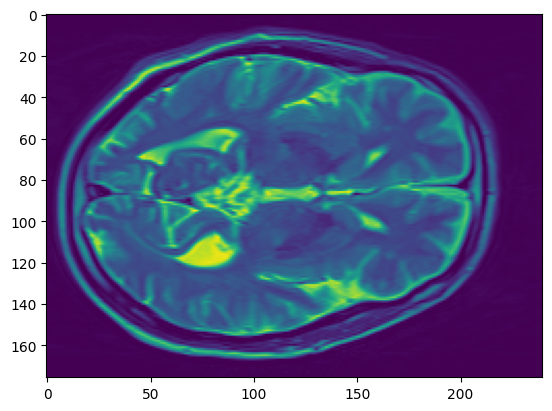

In [12]:
plt.imshow(train_x_image[0] * 255)

In [13]:
# Image NN
input_image = Input(shape = (176, 240, 1), name = "input_image")
conv1 = Conv2D(32, (3, 3), strides = 1, padding = 'same', activation = 'relu')(input_image)
maxpool1 = MaxPool2D((2, 2), strides = 2, padding = 'same')(conv1)

conv2 = Conv2D(32, (3, 3), strides = 1, padding = 'same', activation = 'relu')(maxpool1)
maxpool2 = MaxPool2D((2, 2), strides = 2, padding = 'same')(conv2)

conv3 = Conv2D(32, (3, 3), strides = 1, padding = 'same', activation = 'relu')(maxpool2)
maxpool3 = MaxPool2D((2, 2), strides = 2, padding = 'same')(conv3)

conv4 = Conv2D(32, (3, 3), strides = 1, padding = 'same', activation = 'relu')(maxpool3)
maxpool4 = MaxPool2D((2, 2), strides = 2, padding = 'same')(conv4)

dense_image_1 = Dense(512, activation = 'relu')(maxpool4)
dense_image_2 = Dense(128, activation = 'relu')(dense_image_1)

flatten1 = Flatten()(dense_image_2)
dense_image_3 = Dense(64, activation = 'relu')(flatten1)
dropout1 = Dropout(0.5)(dense_image_3)
dense_image_4 = Dense(64, activation = 'relu')(dropout1)

model_image = Model(inputs = input_image, outputs = dense_image_4)

# Data NN

input_data = Input(shape = (8,), name = "input_data")
dense_data_1 = Dense(16, activation = 'relu')(input_data)
dense_data_2 = Dense(8, activation = 'relu')(dense_data_1)
dense_data_3 = Dense(8, activation = 'relu')(dense_data_2)

model_data = Model(inputs = input_data, outputs = dense_data_3)

concat1 = Concatenate()([model_image.output, model_data.output])
dense_concat = Dense(units = 4, activation = 'sigmoid')(concat1)

model = Model(inputs = [input_image, input_data], outputs = dense_concat)
model.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 176, 240,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 176, 240,  │        320 │ input_image[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 88, 120,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 88, 120,   │      9,248 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 44, 60,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 44, 60,    │      9,248 │ max_pooling2d_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 22, 30,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 22, 30,    │      9,248 │ max_pooling2d_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 11, 15,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 11, 15,    │     16,896 │ max_pooling2d_3[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 11, 15,    │     65,664 │ dense[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 21120)     │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_data          │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │  1,351,744 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 16)        │        144 │ input_data[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 8)         │        136 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      4,160 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 8)         │         72 │ dense_5[0][0]   

 Total params: 1,467,172 (5.60 MB)

 Trainable params: 1,467,172 (5.60 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose=1, factor=0.5, min_lr=0.000001)

In [15]:
history = model.fit(x = Xtr, y = train_y, epochs = 25, validation_data = (Xval, val_y), callbacks = [learning_rate_reduction])

Epoch 1/25


I0000 00:00:1730746737.999348      96 service.cc:145] XLA service 0x7d3758011dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730746738.000141      96 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


13/45 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2474 - loss: 4.0364

I0000 00:00:1730746743.313774      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.2510 - loss: 3.0093 - val_accuracy: 0.4594 - val_loss: 1.2464 - learning_rate: 0.0010
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4219 - loss: 1.2342 - val_accuracy: 0.6303 - val_loss: 0.9840 - learning_rate: 0.0010
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5265 - loss: 1.0107 - val_accuracy: 0.6162 - val_loss: 0.9524 - learning_rate: 0.0010
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6382 - loss: 0.8584 - val_accuracy: 0.6919 - val_loss: 0.7378 - learning_rate: 0.0010
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6986 - loss: 0.7509 - val_accuracy: 0.7479 - val_loss: 0.6577 - learning_rate: 0.0010
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7308 - loss: 0.6966 - val_accuracy: 0.8039 - val_loss: 0.5901 - learning_rate: 0.0010
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7790 - loss: 0.6227 - val_accuracy: 0.

In [16]:
test_x_image = []
test_x_data = []

for i, j in test_x:
    test_x_image.append(i)
    test_x_data.append(j)

test_x_image = np.array(test_x_image) / 255
test_x_data = np.array(test_x_data)

test_y = np.array(test_y)

Xte = {"input_image" : test_x_image, "input_data" : test_x_data}

print("Loss of the model is - ", model.evaluate(Xte, test_y)[0])
print("Accuracy of the model is - ", model.evaluate(Xte, test_y)[1] * 100, '%')

model.save('/kaggle/working/Multi_Model.h5')

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8742 - loss: 0.2954
Loss of the model is -  0.30669108033180237
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8742 - loss: 0.2954
Accuracy of the model is -  86.80089712142944 %


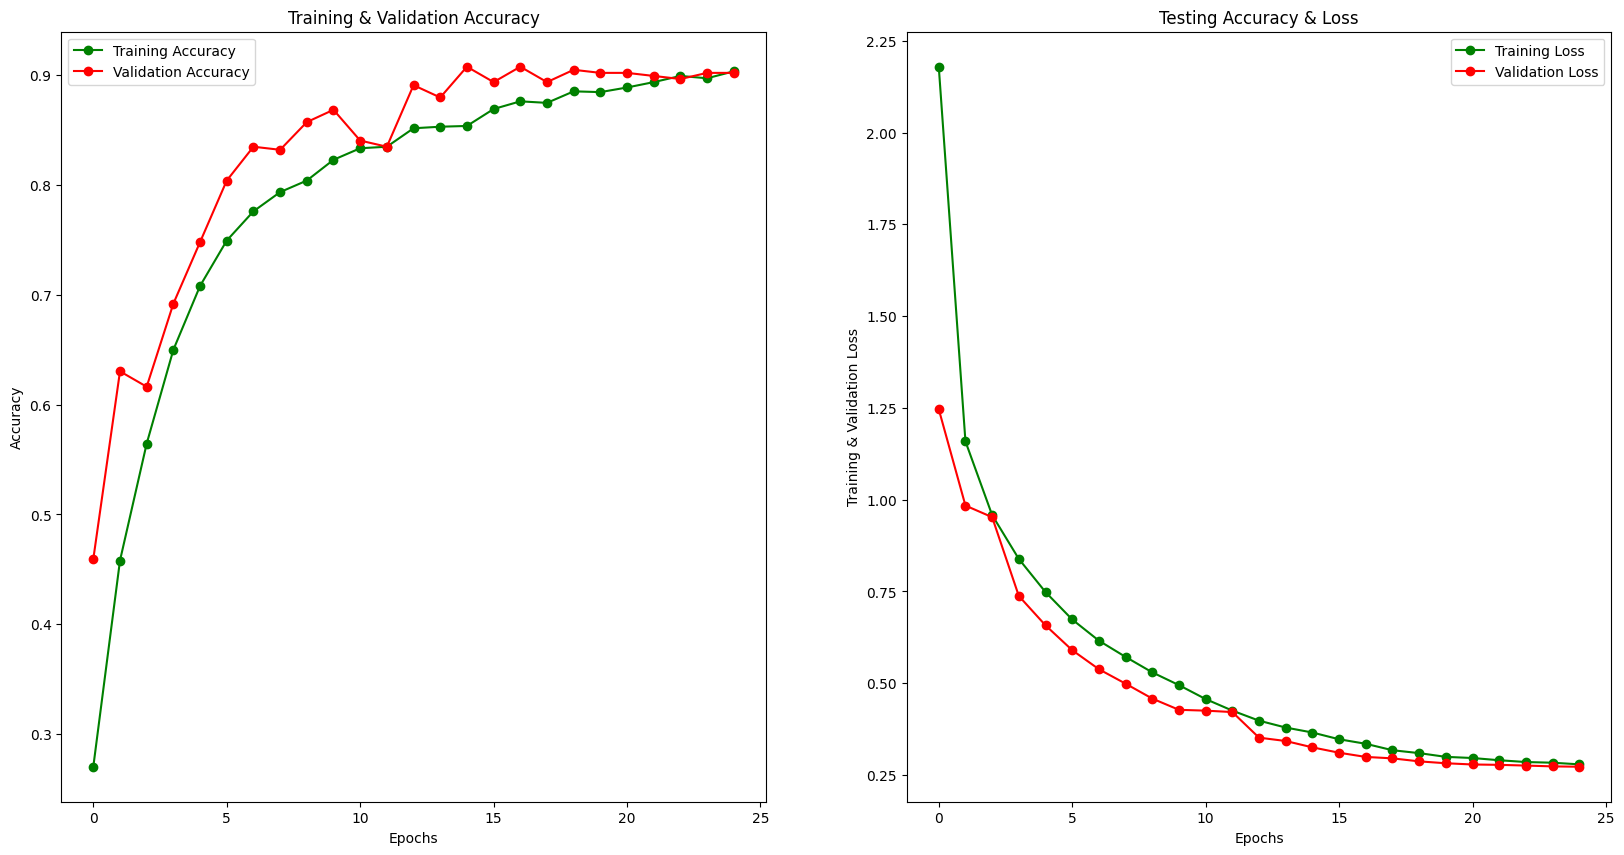

In [18]:
epochs = [i for i in range(25)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'g-o', label = 'Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")

plt.show()

In [19]:
predict_y = model.predict(Xte)
predictions = []
true_test_y = []

for i in range(len(predict_y)):
    predictions.extend(np.where(predict_y[i] == max(predict_y[i]))[0])
    true_test_y.extend(np.where(test_y[i] == max(test_y[i]))[0])

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [24]:
print(classification_report(true_test_y, predictions, target_names = ['Non Dementia (Class 0)', 'Very Mild Dementia (Class 1)', 'Mild Dementia (Class 2)', 'Moderate Dementia (Class 3)']))

                              precision    recall  f1-score   support

      Non Dementia (Class 0)       0.82      0.76      0.79       101
Very Mild Dementia (Class 1)       0.77      0.77      0.77       105
     Mild Dementia (Class 2)       0.89      0.94      0.91       100
 Moderate Dementia (Class 3)       0.96      0.96      0.96       141

                    accuracy                           0.87       447
                   macro avg       0.86      0.86      0.86       447
                weighted avg       0.87      0.87      0.87       447



In [21]:
cm = confusion_matrix(true_test_y, predictions)
print(cm)

[[ 77  24   0   0]
 [ 17  81   7   0]
 [  0   0  94   6]
 [  0   0   5 136]]


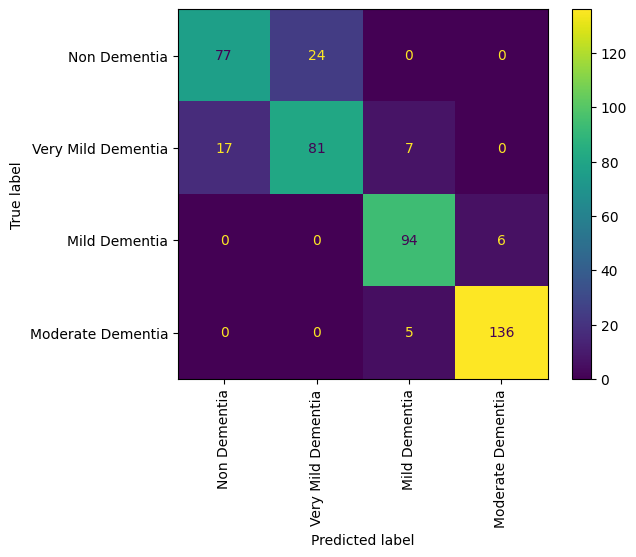

In [31]:
disp = ConfusionMatrixDisplay.from_predictions(true_test_y, predictions, xticks_rotation = 'vertical', display_labels = ["Non Dementia", "Very Mild Dementia", "Mild Dementia", "Moderate Dementia"])

In [73]:
correct = []
incorrect = []

for i in range(len(true_test_y)):
    if (true_test_y[i] == predictions[i]):
        correct.append(i)
    else:
        incorrect.append(i)

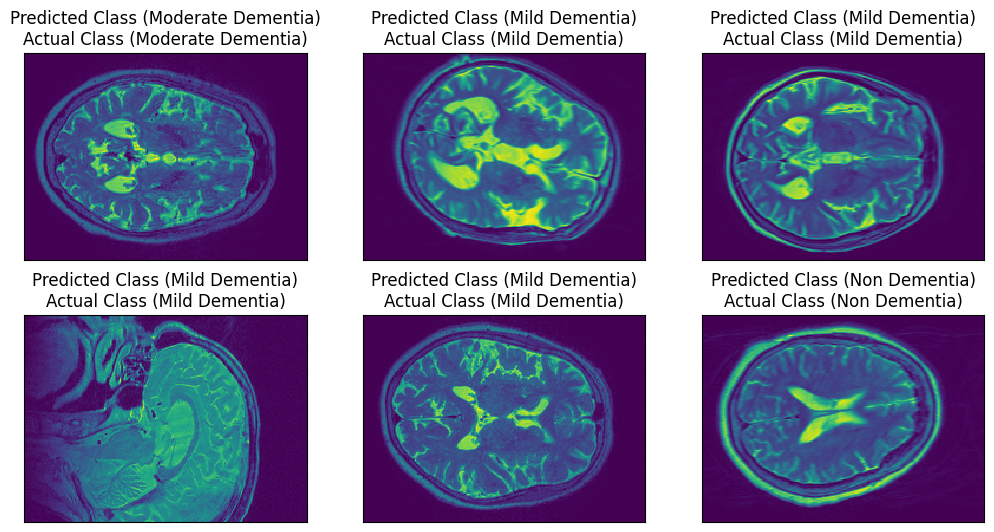

In [76]:
i = 0

for c in correct[:6]:
    plt.subplot(2, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_x_image[c], interpolation='none')

    if (predictions[c] == 0):
        predict_class = "Non Dementia"
    elif (predictions[c] == 1):
        predict_class = "Vey Mild Dementia"
    elif (predictions[c] == 2):
        predict_class = "Mild Dementia"
    else:
        predict_class = "Moderate Dementia"

    if (true_test_y[c] == 0):
        true_class = "Non Dementia"
    elif (true_test_y[c] == 1):
        true_class = "Vey Mild Dementia"
    elif (true_test_y[c] == 2):
        true_class = "Mild Dementia"
    else:
        true_class = "Moderate Dementia"

    plt.title("Predicted Class ({})\nActual Class ({})".format(predict_class, true_class))
    plt.subplots_adjust(top = 7, bottom = 6, left = 5.5, right = 7)

    i += 1

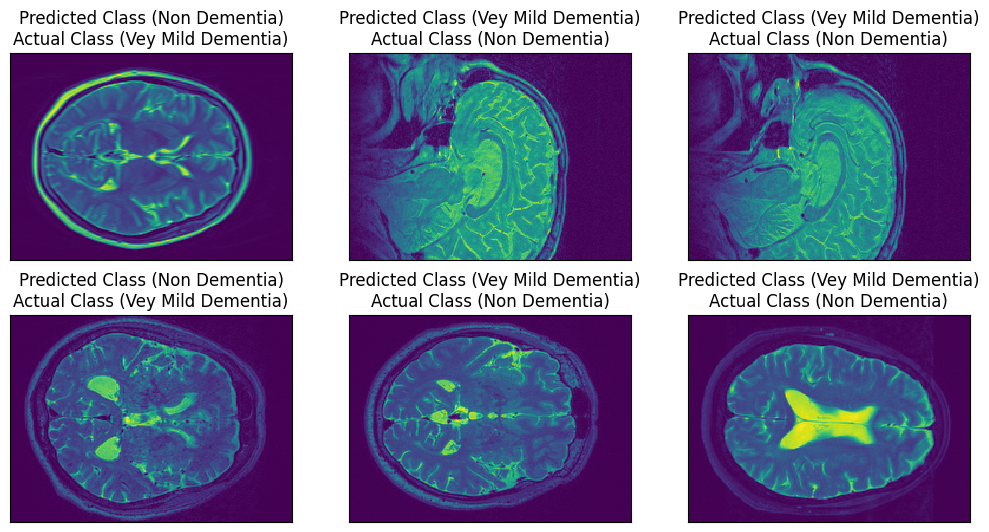

In [77]:
i = 0

for c in incorrect[:6]:
    plt.subplot(2, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_x_image[c], interpolation='none')

    if (predictions[c] == 0):
        predict_class = "Non Dementia"
    elif (predictions[c] == 1):
        predict_class = "Vey Mild Dementia"
    elif (predictions[c] == 2):
        predict_class = "Mild Dementia"
    else:
        predict_class = "Moderate Dementia"

    if (true_test_y[c] == 0):
        true_class = "Non Dementia"
    elif (true_test_y[c] == 1):
        true_class = "Vey Mild Dementia"
    elif (true_test_y[c] == 2):
        true_class = "Mild Dementia"
    else:
        true_class = "Moderate Dementia"

    plt.title("Predicted Class ({})\nActual Class ({})".format(predict_class, true_class))
    plt.subplots_adjust(top = 7, bottom = 6, left = 5.5, right = 7)

    i += 1